In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import sys

In [2]:
sys.path.insert(0, '/home/llr/cms/wind/cmssw/CMSSW_9_4_2/src/ZZAnalysis/AnalysisStep/test/Python/')

In [3]:
from trainlib.ConfigFileHandler import ConfigFileHandler
from trainlib.ConfigFileUtils import ConfigFileUtils

In [12]:
variable_pretty_names = {
    "D_VBF1j_ggH_ME": r'$\mathcal{D}_{\mathrm{VBF-1j}, ggH}$',
    "D_VBF2j_ggH_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, ggH}$',
    "D_VBF2j_WHh_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, WH\mathrm{-hadr.}}$',
    "D_VBF2j_ZHh_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, ZH\mathrm{-hadr.}}$',
    "D_WHh_ZHh_ME": r'$\mathcal{D}_{WH\mathrm{-hadr.}, ZH\mathrm{-hadr.}}$',
    "D_WHh_ggH_ME": r'$\mathcal{D}_{WH\mathrm{-hadr.}, ggH}$',
    "D_ZHh_ggH_ME": r'$\mathcal{D}_{ZH\mathrm{-hadr.}, ggH}$',
    "D_bkg_ME": r'$\mathcal{D}_{\mathrm{bkg}}$',
    
    "ExtraLepEta[ExtraLepPt|0]": r'$\eta(e\ell_{(1)})$',
    "ExtraLepEta[ExtraLepPt|1]": r'$\eta(e\ell_{(2)})$',
    "ExtraLepEta[ExtraLepPt|2]": r'$\eta(e\ell_{(3)})$',
    "ExtraLepPhi[ExtraLepPt|0]": r'$\phi(e\ell_{(1)})$',
    "ExtraLepPhi[ExtraLepPt|1]": r'$\phi(e\ell_{(2)})$',
    "ExtraLepPt[ExtraLepPt|0]": r'$p_T(e\ell_{(1)})$',
    "ExtraLepPt[ExtraLepPt|1]": r'$p_T(e\ell_{(2)})$',
    "ExtraLepPt[ExtraLepPt|2]": r'$p_T(e\ell_{(3)})$',

    "JetEta[JetPt|0]": r'$\eta(j_{(1)})$',
    "JetEta[JetPt|1]": r'$\eta(j_{(2)})$',
    "JetEta[JetPt|2]": r'$\eta(j_{(3)})$',
    "JetEta[JetPt|3]": r'$\eta(j_{(4)})$',
    
    "JetPhi[JetPt|0]": r'$\phi(j_{(1)})$',
    "JetPhi[JetPt|1]": r'$\phi(j_{(2)})$',
    "JetPhi[JetPt|2]": r'$\phi(j_{(3)})$',
    "JetPhi[JetPt|3]": r'$\phi(j_{(4)})$',
    
    "JetPt[JetPt|0]": r'$p_T(j_{(1)})$',
    "JetPt[JetPt|1]": r'$p_T(j_{(2)})$',
    "JetPt[JetPt|2]": r'$p_T(j_{(3)})$',
    "JetPt[JetPt|3]": r'$p_T(j_{(4)})$',
    
    "PFMET": "MET",
    
    "Z1Mass": r'$m(Z_1)$',
    "Z2Mass": r'$m(Z_2)$',
    "Z1Pt": r'$p_T(Z_1)$',
    "Z2Pt": r'$p_T(Z_2)$',
    "Z1Flav": r'$\mathfrak{f}(Z_1)$',
    "Z2Flav": r'$\mathfrak{f}(Z_2)$',
    
    "ZZEta": r'$\eta(ZZ)$',
    #"ZZMassErr": r'$\sigma(m(ZZ))$',
    "ZZMassErr": r'$\sigma(m_{4\ell})$',
    #"ZZMass_masked": r'$m(ZZ)$',
    "ZZMass_masked": r'$m_{4\ell}$',
    "ZZPhi": r'$\phi(ZZ)$',
    "ZZPt": r'$p_T(ZZ)$',
    "costhetastar": r'$\mathrm{cos}(\theta^{*})$',
    "helcosthetaZ1": r'$\mathrm{cos}(\theta_1)$',
    "helcosthetaZ2": r'$\mathrm{cos}(\theta_2)$',
    "helphi": r'$\Phi$',
    "phistarZ1": r'$\Phi_1$',
    
    "nCleanedJetsPt30": r'$n(j)$',
    "nCleanedJetsPt30BTagged_bTagSF": r'$n(j_b)$',
    "nExtraZ": r'$n(eZ)$',
    "nExtraLep": r'$n(e\ell)$',
    "xistar": r'$\xi^{*}$',
    "xi": r'$\xi$'

}

In [13]:
discriminant_pretty_names = {
    "D_VBF_ggH_2j_ML": "D_VBF-2j_ggH_ML",
    "D_VBF_ggH_1j_ML": "D_VBF-1j_ggH_ML",
    "D_VBF_ggH_0j_ML": "D_VBF-0j_ggH_ML"
}

In [14]:
def convert_model_label(raw):
    retval = discriminant_pretty_names.get(raw, raw)
    
    retval = retval.replace('D_', '')
    retval = retval.replace('_ML', '')
    retval = retval.replace('_', ', ')
    
    # get rid of the abbreviated forms
    retval = retval.replace('qq', r'q\bar{q}\rightarrow ZZ')
    retval = retval.replace('ZX', r'Z+X')
    retval = retval.replace('ZHl', r'ZH\mathrm{-lept.}')
    retval = retval.replace('ZHh', r'ZH\mathrm{-hadr.}')
    retval = retval.replace('WHl', r'WH\mathrm{-lept.}')
    retval = retval.replace('WHh', r'WH\mathrm{-hadr.}')
    retval = retval.replace('bkg', 'Z+X')
    retval = retval.replace('ttHh', r't\bar{t}H\mathrm{-hadr.}')
    retval = retval.replace('ttHl', r't\bar{t}H\mathrm{-lept.}')
    retval = retval.replace('ggH', r'ggH')
    retval = retval.replace('ZHMET', r'VH\mathrm{-MET}')
    
    retval = r'$s_{' + retval + r'}$'
    
    # have special ones for the different jet-number components
    if "VBF-2j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) \geq 2]$'
    elif "VBF-1j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) = 1]$'
    elif "VBF-0j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) = 0]$'
    
    return retval

In [15]:
def convert_variable_name(raw):
    return variable_pretty_names.get(raw, raw)

In [16]:
def make_input_plot(input_file):
    confhandler = ConfigFileHandler()
    confhandler.load_configuration(input_file)
    models = confhandler.get_sections()
    
    df = pd.DataFrame()

    for model in models:
        cur_sect = confhandler.get_section(model)

        used_nonperiodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["nonperiodic_columns"], lambda x: x))
        used_periodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["periodic_columns"], lambda x: x))

        used_vars = used_nonperiodic_vars + used_periodic_vars
        var_dict = {col: [1.0] for col in used_vars}
        var_dict["model"] = model

        row_df = pd.DataFrame.from_dict(var_dict)

        df = pd.concat([df, row_df], axis = 0)

    df = df.fillna(0.0)
    
    datacols = [col for col in df.columns if col is not "model"]
    plot_data = df[datacols].as_matrix()
    
    y_label = [convert_variable_name(name) for name in np.array(datacols)]
    x_label = [convert_model_label(label) for label in df["model"].as_matrix()]
    
    fig = plt.figure(figsize = (12, 10))
    
    ax = fig.add_subplot(111)
    
    cax = ax.matshow(plot_data.transpose(), cmap = 'Blues', vmin = 0, vmax = 1)
    ax.set_xticklabels(np.concatenate([[''], x_label]), rotation = 'vertical', fontsize = 11)
    ax.set_yticklabels(np.concatenate([[''], y_label]), fontsize = 10)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tight_layout()
    
    return fig

In [17]:
def make_fscore_plot(input_file):
    df = pd.DataFrame.from_csv(input_file)
    
    cols = [col for col in df["discriminant"]]
    
    df = df.loc[df["discriminant"].isin(cols)]
    
    orig_order = df.columns.tolist()
    
    new_order = orig_order[:-11] + orig_order[-6:-2] + [orig_order[-11]] + orig_order[-9:-6] + orig_order[-2:] + [orig_order[-10]]
    print new_order
    print len(new_order)
    print len(orig_order)
    
    df = df[new_order]
    
    df = df.fillna(0.0)
    
    df_dataonly = df.copy()
    del df_dataonly["discriminant"]
        
    # perform the MET fix
    mask = df["discriminant"].str.contains("bkg")
    df_dataonly["PFMET"][mask] = 0
    
    # remove all those that have not been selected
    df_dataonly[df_dataonly < 0.01] = 0.0
    df_dataonly["Z1Flav"] = 0
    
    #df_dataonly[df_dataonly > 0.01] = 1

    # renormalize the values
    df_dataonly = df_dataonly.div(df_dataonly.sum(axis = 1), axis = 0)
    
    # delete empty rows
    mask = (df_dataonly!=0).any(axis=0)
    to_be_kept = mask[mask == True].index.tolist()
    
    df_dataonly[df_dataonly == 0.0] = np.nan
    
    df_dataonly = df_dataonly[to_be_kept]
    df = df[to_be_kept + ["discriminant"]]
    
    # now plot the data contained in the table to have a global picture of the relevant input variables
    datacol_labels = [col for col in df.columns.tolist() if col != "discriminant"]
    variable_data = df_dataonly[datacol_labels].as_matrix().transpose()
    
    datacol_labels = [convert_variable_name(name) for name in datacol_labels]
    datacol_labels = np.concatenate([[''], np.array(datacol_labels)])
    
    discriminant_labels = [convert_model_label(col) for col in df["discriminant"]]
    discriminant_labels = np.concatenate([[''], discriminant_labels])
    
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    
    cmap = matplotlib.cm.YlGn
    cmap.set_bad(color='#e2e2e2')
    
    cax = ax.matshow(variable_data, interpolation = 'nearest', cmap = cmap, vmin = 0, vmax = 0.25)
            
    ax.set_xticklabels(discriminant_labels, rotation = 'vertical')
    ax.set_yticklabels(datacol_labels)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    cbar = fig.colorbar(cax, fraction=0.04, pad=0.04, orientation = 'horizontal')
    
    plt.tight_layout()
    
    return fig

In [18]:
fig = make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_fscore_table_metfix.csv")

['D_VBF1j_ggH_ME', 'D_VBF2j_WHh_ME', 'D_VBF2j_ZHh_ME', 'D_VBF2j_ggH_ME', 'D_WHh_ZHh_ME', 'D_WHh_ggH_ME', 'D_ZHh_ggH_ME', 'D_bkg_ME', 'ExtraLepEta[ExtraLepPt|0]', 'ExtraLepEta[ExtraLepPt|1]', 'ExtraLepPhi[ExtraLepPt|0]', 'ExtraLepPhi[ExtraLepPt|1]', 'ExtraLepPt[ExtraLepPt|0]', 'ExtraLepPt[ExtraLepPt|1]', 'JetEta[JetPt|0]', 'JetEta[JetPt|1]', 'JetPhi[JetPt|0]', 'JetPhi[JetPt|1]', 'JetPt[JetPt|0]', 'JetPt[JetPt|1]', 'PFMET', 'Z1Flav', 'Z1Mass', 'Z1Pt', 'Z2Flav', 'Z2Mass', 'Z2Pt', 'ZZEta', 'ZZMassErr', 'ZZMass_masked', 'ZZPhi', 'ZZPt', 'nCleanedJetsPt30', 'nCleanedJetsPt30BTagged_bTagSF', 'nExtraLep', 'nExtraZ', 'costhetastar', 'helcosthetaZ1', 'helcosthetaZ2', 'helphi', 'phistarZ1', 'xistar', 'discriminant']
43
43


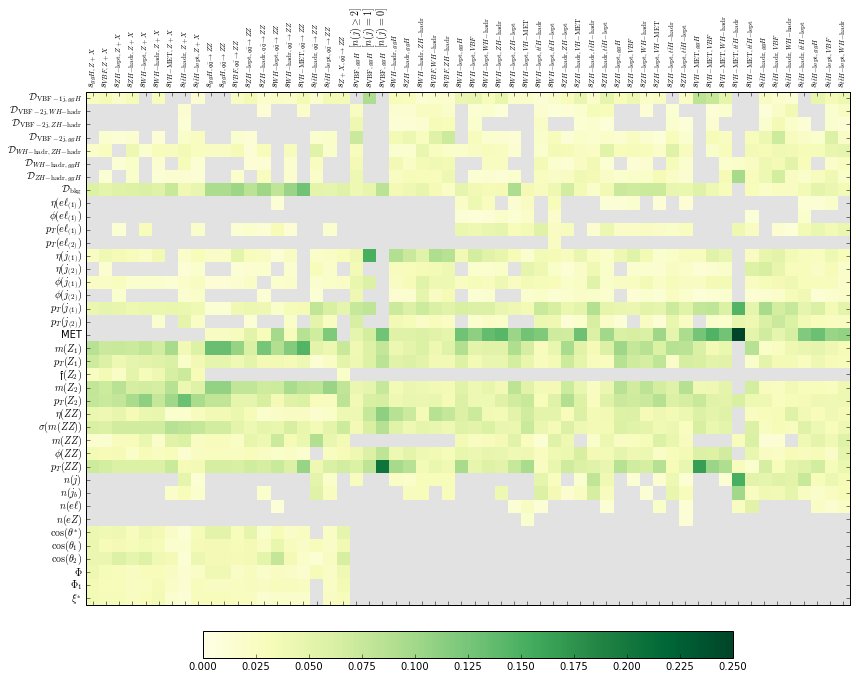

In [188]:
plt.show()

In [19]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/fscore_continuous_fullmassrange_abbreviations.pdf")

In [190]:
fig = make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_fscore_table_qq_restricted.csv")

['D_VBF1j_ggH_ME', 'D_VBF2j_WHh_ME', 'D_VBF2j_ZHh_ME', 'D_VBF2j_ggH_ME', 'D_WHh_ZHh_ME', 'D_WHh_ggH_ME', 'D_ZHh_ggH_ME', 'D_bkg_ME', 'ExtraLepEta[ExtraLepPt|0]', 'ExtraLepEta[ExtraLepPt|1]', 'ExtraLepPhi[ExtraLepPt|0]', 'ExtraLepPhi[ExtraLepPt|1]', 'ExtraLepPt[ExtraLepPt|0]', 'ExtraLepPt[ExtraLepPt|1]', 'JetEta[JetPt|0]', 'JetEta[JetPt|1]', 'JetPhi[JetPt|0]', 'JetPhi[JetPt|1]', 'JetPt[JetPt|0]', 'JetPt[JetPt|1]', 'PFMET', 'Z1Flav', 'Z1Mass', 'Z1Pt', 'Z2Flav', 'Z2Mass', 'Z2Pt', 'ZZEta', 'ZZMassErr', 'ZZMass_masked', 'ZZPhi', 'ZZPt', 'nCleanedJetsPt30', 'nCleanedJetsPt30BTagged_bTagSF', 'nExtraLep', 'nExtraZ', 'costhetastar', 'helcosthetaZ1', 'helcosthetaZ2', 'helphi', 'phistarZ1', 'xistar', 'discriminant']
43
43


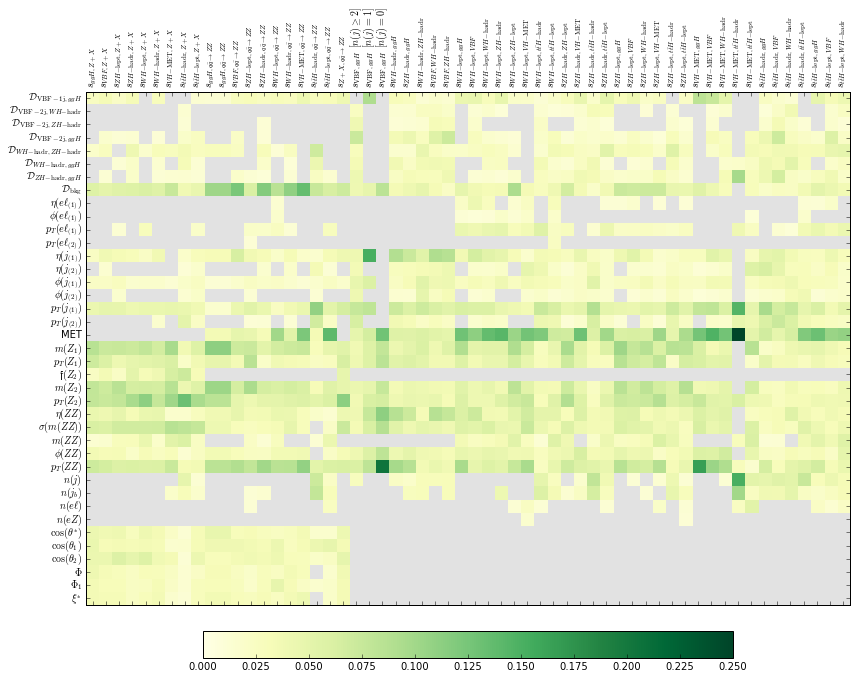

In [182]:
plt.show()

In [191]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/fscore_continuous_qq_restricted.pdf")